In [2]:
import numpy as np
import DMemu
import matplotlib.pyplot as plt
from time import time

In [3]:
# load emulator
emul = DMemu.OBDemu()

One-body decays emulator loaded!


In [4]:
# print parameter domain

emul.print_parameter_space()

k: k<10 (1/Mpc)
z: z<1
f: f in [0,1]
Gamma: Gamma in [0,1/31.6] (1/Gyr)
omega_b: omega_b in [0.019,0.026]
omega_m: omega_m in [0.09,0.28]
h: h in [0.6,0.8]


In [26]:
# predict suppressions for three different scales at three different redshifts
k = np.array([1,2,4]) # in h/Mpc
z = np.array([0.0,0.5,1.0])

# this the order and types of input parameters
# k: Union[float,list], 
# z: Union[float,list], 
# Gamma: float = 1e-10, 
# f: float = 0., 
# Ob: float =0.049, 
# Om: float = 0.315, 
# h:float = 0.67

Gamma = 1/50
f = 1.0

Omega_m = 0.31
Omega_b = 0.049
h = 0.70

print(emul.predict(k,z,Gamma,f,Omega_b,Omega_m,h))

[0.85805167 0.88997303 0.91033295]


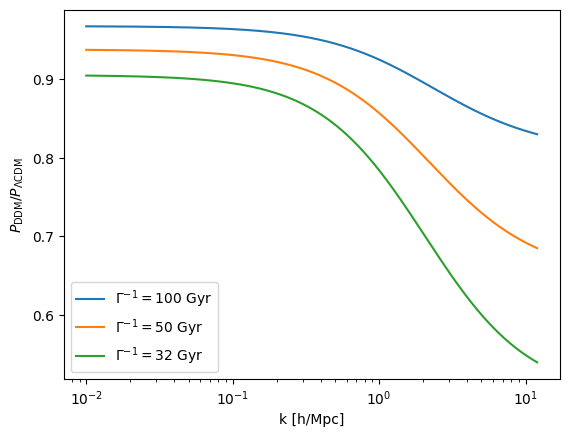

In [31]:
# predict suppressions between kmin and kmax for a single redshift
kmin = 1e-2 # h/Mpc
kmax = 12 # h/Mpc
ks = np.logspace(np.log10(kmin),np.log10(kmax),1000)
zs = 0.0
Omega_b = 0.049
Omega_m = 0.315
h = 0.67

for gamma_decay in [1/100,1/50,1/32]:
    f = 1.0
    pks = emul.predict(ks,zs,gamma_decay,f,Omega_b,Omega_m,h)
    # plot
    plt.semilogx(ks,pks,label = r'$\Gamma^{-1} = %.0f$ Gyr'%(1.0/gamma_decay))
    
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{\rm DDM}/P_{\Lambda \rm CDM}$')
# plt.savefig('obdemu_example.jpeg',dpi=350)

In [21]:
# predict suppression for a single scale and different redshifts
k = 0.50 # h/Mpc
zs = [0.0,0.5,1.0,1.5]
gamma = 1/50
f = 1.0

st = time()
pks = emul.predict(k,zs,gamma,f)
print('ellapsed:',time() - st)
print('got Pk:',pks)

You have chosen z>1; z=[0.  0.5 1.  1.5]!
-> the fit could be unaccurate with this choice! (error might be > 10%)
ellapsed: 0.002553701400756836
got Pk: [0.89603679 0.93999538 0.96356076 0.97705958]
